# Heart Failure Prediction

## Introduction

Congestive heart failure is the most common diagnosis in the United States. Currently, more than 5 million people in the US have congestive heart failure. This number is only projected to increase as our population continues to expand and it is said that one in nine deaths is caused by heart failure. 


## Problem Statement

That being said, the focus of our study revolves around the question of, Can we build a model that can help us determine that given a certain feature set will a patient be diagnosed with myocardial infarction? Our study will focus on specific features like the age of the patient, blood pressure, and sex to predict whether or not a patient will experience heart failure. 


## Background

Congestive heart failure happens when the heart doesn’t pump blood effectively to the heart as it normally should. There is a common misconception that heart failure means it is about to stop working altogether. In general, heart failure means that the muscle gradually has become less able to contract to provide enough blood to exit the heart. This results in a blockage as the heart is getting blood pumped in faster than it can pump out -- hence congestion.


<center> 
<b>Dataset Description
</center>
    
The following dataset was obtained by the UC Irvine Machine Learning Repository. The dataset contains a total of 76 attributes from the Cleaveland database that aims to predict the presense of heart disease in patients. We narrow down our attributes to 12 and perform exploratory analysis on the following variables. 

| Variable | Description |
| :- | :- |
| age | age in years. |
| sex | 1 if male, 0 if female. |
| chestpaintype | chest pain type, (1 if typical angina, 2 if atypical angina, 3 if non-anginal pain, and 4 if asymptomatic). |
| restingbp | resting blood pressure (in mm Hg on admission to the hospital). |
| cholesterol | serum cholestoral in mg/dl. |
| fastingbs | fasting blood sugar > 120 mg/dl, 1 = true; 0 = false. |
| restecg | resting electrocardiographic results. |
| maxhr | maximum heart rate achieved. |
| exerciseangina | exercise induced angina, 1 = yes; 0 = no. |
| oldpeak | ST depression induced by exercise relative to rest. |
| st_slope | the slope of the peak exercise ST segment, (1 upsloping, 2 flat, and 3 downsloping). |
| target | diganosis of heart disease, 0 if < 50% diameter narrowing in other words no heart disease, 1 if >50% diameter narrowing. |


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In our table, we can see a mix of quantitative and qualitative variables. Age, resting blood pressure, cholesterol, max heart rate, and old peak are quantitative. While variables like chest pain type,  fasting blood sugar, resting ECG, max heart rate, exercise angina, and slope are qualitative variables. Alluding to the latter part of our report we are going to have to manipulate the qualitative variables and create dummies for these so that we can be consistent throughout our model.

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.columns = df.columns.map(lambda x: x.lower())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Visual Analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'restingbp'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'fastingbs'}>,
        <AxesSubplot:title={'center':'maxhr'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'heartdisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

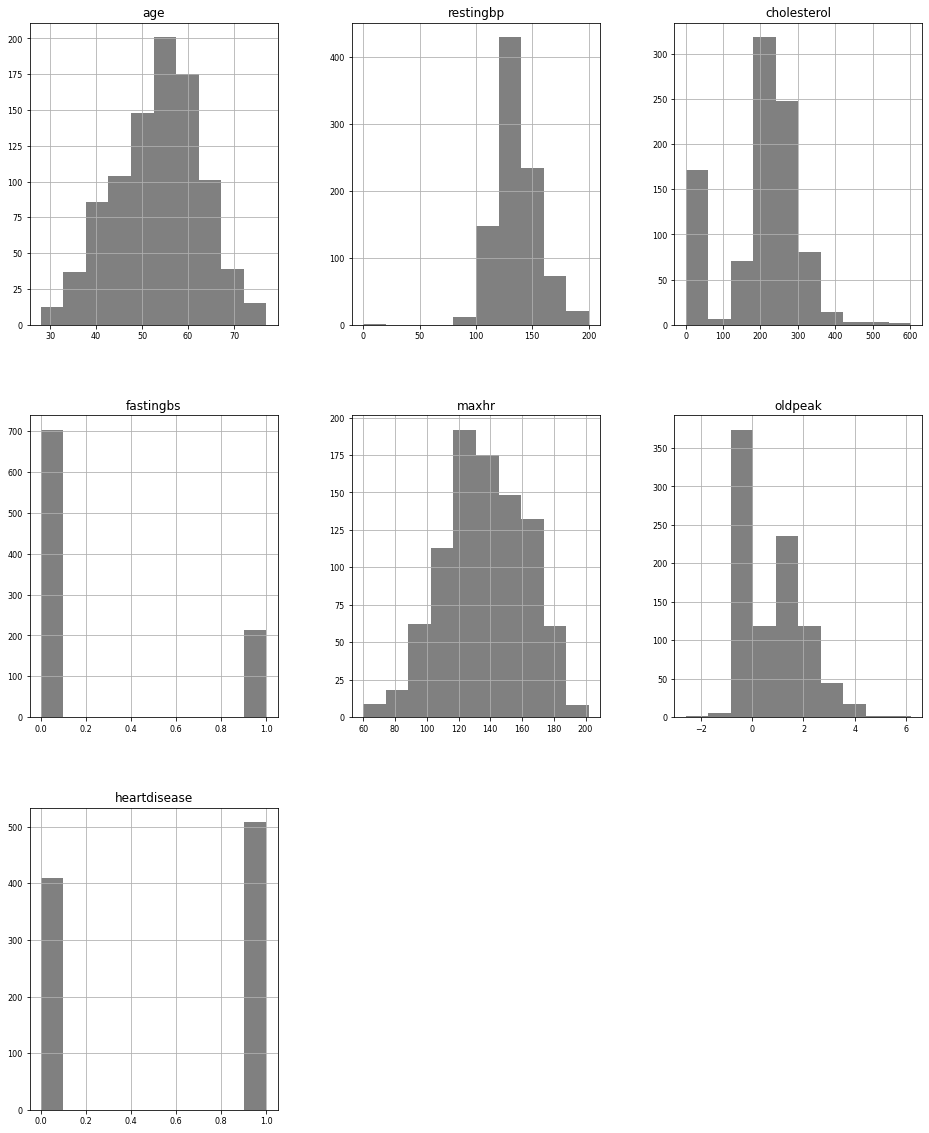

In [7]:
df.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize=8, color='gray')

In the figure above, I create a histogram distribution plot to clearly identify the types of variables that we are using in our model. We can see that roughly our quantitative variables like age, resting blood pressure, cholesterol, max heart rate, and old peak, follow a normal distribution. Our normality assumption will hold as our sample size in the study was quite large. Variables like fasting blood sugar, and heart disease are in fact binary. 

<AxesSubplot:>

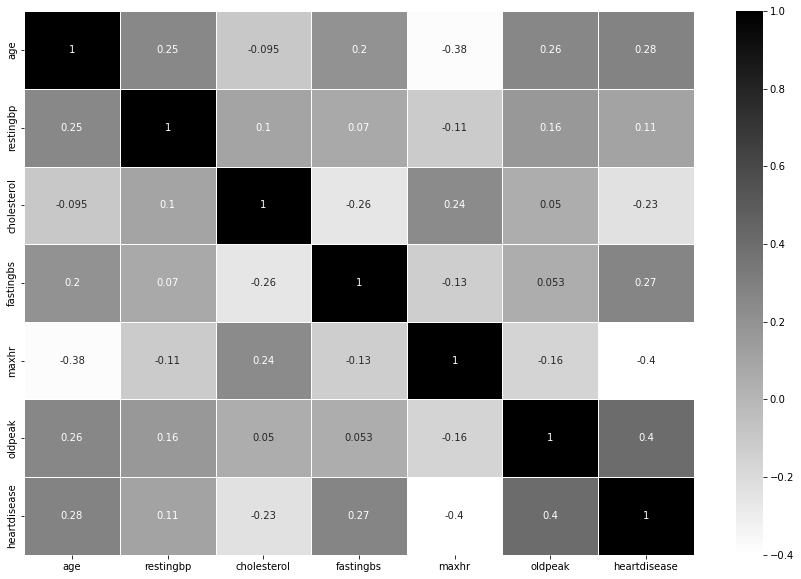

In [8]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='binary',linewidths=.5)

Initially, when building my model, I was going to approach the problem a bit differently by handpicking the feature set so I plotted this correlation plot to look at the relationships amongst different independent variables. I still decided to include it in our slides because it’s a neat little graph and we can still see the types of relationships amongst variables. We can already see strong relationships with resting blood pressure and age, fasting blood sugar and age, peak and age, heart disease and age, max heart rate and cholesterol, and heart disease and fasting blood sugar.

In [9]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


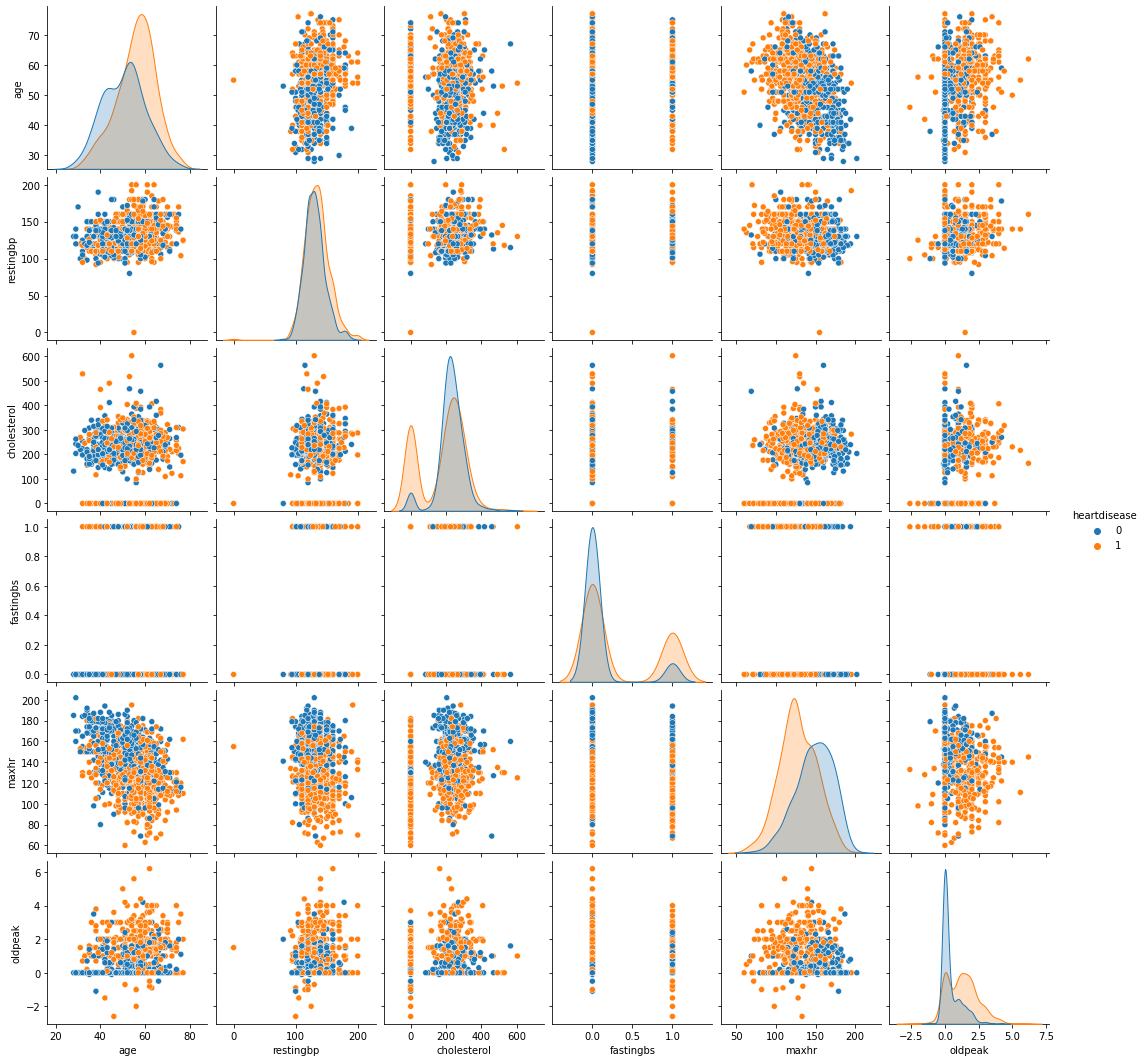

In [10]:
sns.pairplot(df, hue='heartdisease');

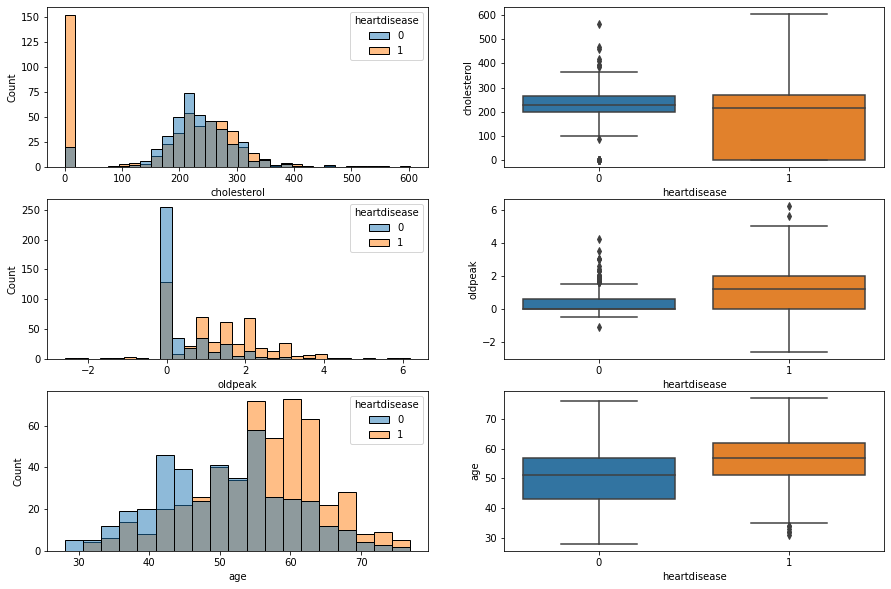

In [11]:
fig, ax =plt.subplots(3,2, figsize=(15,10))
sns.histplot(data=df, x='cholesterol', hue='heartdisease', ax=ax[0,0]);
sns.boxplot(data=df, x='heartdisease', y='cholesterol', ax=ax[0,1]);
sns.histplot(data=df, x='oldpeak', hue='heartdisease', ax=ax[1,0]);
sns.boxplot(data=df, x='heartdisease', y='oldpeak', ax=ax[1,1]);
sns.histplot(data=df, x='age', hue='heartdisease', ax=ax[2,0]);
sns.boxplot(data=df, x='heartdisease', y='age', ax=ax[2,1]);

## Preprocessing

In [12]:
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
restingbp,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fastingbs,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
maxhr,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
heartdisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [14]:
df_encoded = pd.get_dummies(df)

In [15]:
df_encoded

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease,sex_F,sex_M,chestpaintype_ASY,...,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


Using the get dummies function in pandas we create dummy variables for our categorical variables like sex. For example, if we take a look at our sex variable we can see sex underscore F represents women in our sample and sex underscore M represents men in our sample. Chest pain also has been broken into different categories between angina, atypical angina, non-anginal pain, and asymptomatic. You get the gist of what is going on here, every categorical variable changes into a binary variable.

In [16]:
df_encoded.drop(['sex_F','exerciseangina_N'], axis=1, inplace=True)

In our model to avoid multicollinearity, we drop a few columns. In the code above I drop our female binary variable and our exercise angina variable. Then I go ahead and rename a few columns to make it more clear to the reader reviewing my code to sex_male and exercise_angina.

In [17]:
df_encoded.rename(columns={'sex_M':'sex_male',
                          'exerciseangina_Y':'exercise_angina'}, inplace=True)

In [18]:
#Importing necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In the next section of code, we create our x, independent variables, and y, our target variable of heart disease. We then scale our data to make it more manageable. 

In [19]:
X, y = df_encoded.drop(['heartdisease'],axis=1), df_encoded['heartdisease']

In the next section of code, we parse in our scaled-down data frame and train it by using the train_test_split function.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, stratify=y, random_state=0)

In [22]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [23]:
y_train.value_counts(), y_test.value_counts()

(1    355
 0    287
 Name: heartdisease, dtype: int64,
 1    153
 0    123
 Name: heartdisease, dtype: int64)

## Building our model

In [24]:
# Importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

We run the StratifiedKFold in order to represent our data as a stratified sample. We do this just to represent the original data in equal proportions. This will allow us to influence our accuracy score positively. 

### Logistic Regression

In the latter code, we import GridSearchCV to increase the efficiency of our model by tuning parameters. Here we are basically running this code so that it runs through all different parameters that are fed into a grid to produce the best combination of parameters. We then begin training our logit model by parsing in X_train and y_train. 

In [26]:
logit = LogisticRegression(random_state=0, class_weight='balanced')
logit_param = {'C': np.logspace(-2, 3, 50)}

In [27]:
%%time
gs_logit = GridSearchCV(logit, logit_param, cv=skf, n_jobs=-1, verbose=1)
gs_logit.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 215 ms, sys: 81.2 ms, total: 297 ms
Wall time: 3.65 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.26485522e-02, 1.59985872e-02, 2.02358965e-02,
       2.55954792e-02, 3.23745754e-02, 4.09491506e-02, 5.17947468e-02,
       6.55128557e-02, 8.28642773e-02, 1.04811313e-01, 1.32571137e...
       2.81176870e+00, 3.55648031e+00, 4.49843267e+00, 5.68986603e+00,
       7.19685673e+00, 9.10298178e+00, 1.15139540e+01, 1.45634848e+01,
       1.84206997e+01, 2.32995181e+01, 2.94705170e+01, 3.72759372e+01,
       4.71486636e+01, 5.96362332e+01, 7.54312006e+01, 9.54095476e+01,
       1.20679264e+02, 1.52641797e+02, 1.93069773e+02, 2.44205309e+02,
       3.08884360e+02, 3.90693994e+02, 4.94171336e+02, 6.25055193e+02,
       7.90604321e+02, 1.00000000e+03])},
             verbose=1)

In [28]:
logit_best = gs_logit.best_estimator_
logit_best, gs_logit.best_score_

(LogisticRegression(C=0.025595479226995357, class_weight='balanced',
                    random_state=0),
 0.8598352713178293)

In [29]:
logit_feature = pd.DataFrame(logit_best.coef_, columns=X_train.columns, index=['result']).T

In [30]:
logit_feature

,result
age,0.128415
restingbp,0.120001
cholesterol,-0.306077
fastingbs,0.290796
maxhr,-0.209273
oldpeak,0.293845
sex_male,0.303448
chestpaintype_ASY,0.372827
chestpaintype_ATA,-0.250517
chestpaintype_NAP,-0.152534


These would be the coefficients in our logistic regression to the left. We then pass in our test set, X_test and print out the classification report. Here we can see that in terms of precisely classifying whether a patient develops heart failure within our model is at 92% level of precision. Looking at being able to precisely predict a patient without heart failure within our model is at 80% level of precision. Our recall value in our model is relatively high as well. Recall that the recall value tells us, of the true condition how many did we get right? So our recall value here shows a relatively strong model and we can see this translated into our F1 score, which is basically the weighted average of precision and recall. 

In [31]:
logit_pred = logit_best.predict(X_test)
logit_pred_proba = logit_best.predict_proba(X_test)[:,1]

In [32]:
print(classification_report(y_test, logit_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       123
           1       0.92      0.82      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [33]:
roc_auc_score(y_test, logit_pred_proba)

0.9418141240235932

Moving down our model we see the ROC score. This score is essentially the true positive rate against false positive rate and in our model this is above 90% at 94.18%.

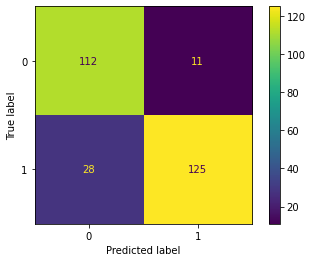

In [34]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, logit_pred)).plot();

## KNN

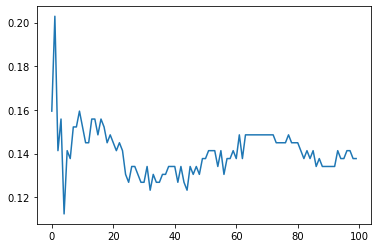

In [35]:
n_neighbors = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    n_neighbors.append(np.mean(knn_pred !=y_test))
plt.plot(n_neighbors);

In [36]:
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':range(1,101)}

In [37]:
%%time
gs_knn = GridSearchCV(knn, knn_param, cv=skf, n_jobs=-1, verbose=1)
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 256 ms, sys: 21 ms, total: 277 ms
Wall time: 2.28 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 101)}, verbose=1)

In [38]:
knn_best = gs_knn.best_estimator_
knn_best, gs_knn.best_score_

(KNeighborsClassifier(n_neighbors=61), 0.8722868217054263)

In [39]:
knn_pred = knn_best.predict(X_test)
knn_pred_proba = knn_best.predict_proba(X_test)[:,1]

In [40]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       123
           1       0.89      0.86      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



We also print out a classification report for this model. In our classification model we can see that this model produces lower scores for precision. In predicting whether an individual has heart failure or not, we can see that the precision score for an individual with heart failure is at 89% and the precision score for an individual without heart failure is 83%. The recall score for for both an individual with heart failure and without heart failure is 86%. We can make similar conjectures as before with our f1 score which is the weighted average of precision and recall. An individual predicted without heart failure has an f1 score of 85% and an individual predicted with heart failure has an f1 score of 87%. We get a slightly higher ROC score at 94.96%. 

In [41]:
roc_auc_score(y_test, knn_pred_proba)

0.9496253786067272

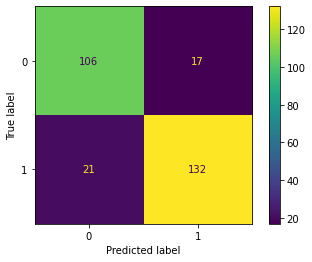

In [42]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_pred)).plot();

# Conclusion

## Final thoughts

We want to be able to predict whether a patient has heart failure or not with a certain level of accuracy. This will ultimately aid the healthcare field because having a minimized feature set to predict heart failure cuts down on examination/testing costs for clinics. Congestive heart failure is the most common health issue in the U.S. With the pandemic continuing to spiral in infection rates, and more and more employers opting for a work from a home model, increases in congestive heart failure are only expected to increase.

Comparing both models, I would opt to use the logistic regression model in predicting whether or not an individual has heart failure or not. The model’s results show high accuracy rates in predictability and although the model has a lower ROC score, the trade-off to roughly a 10% increase in the precision score is reasonable in my opinion.

Going back to our condensed feature set all we need is age, blood pressure, cholesterol, blood sugar levels, heart rate, sex, chest pain type, and the electrocardiogram to be able to predict the presence of heart failure with a ~94% level of accuracy. This will ultimately aide in testing because on average uninsured patients pay roughly $5,000 for the cardiovascular stress test analysis. I’m assuming in California the average should be much higher. Our results in our model show promising results within the field of obtaining 7 to 8 characteristics of every patient to be able to predict whether or not they have heart failure.